Author - Meghana Bhat, meghanab@umich.edu
Applicant to Data Science Intern at Trimble

1. a)

SELECT name.Student_ID, name.Name 

FROM name_table as name 

LEFT JOIN mark_table as mark on name.Student_ID = mark.Student_ID 

WHERE mark.Total_marks > 80

In [188]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
# 1. b)
name_table = pd.DataFrame()
name_table["StudentID"] = ['V001', 'V002', 'V003', 'V004']
name_table["Name"] = ['Abe', 'Abhay', 'Acelin', 'Adelphos']
name_table = name_table.set_index("StudentID")

mark_table = pd.DataFrame()
mark_table["StudentID"] = ['V001', 'V002', 'V003', 'V004']
mark_table["Total_marks"] = [95, 80, 74, 81]
mark_table = mark_table.set_index("StudentID")

In [60]:
def change_case(name):
    if 'e' in name:
        return name.upper()
    return name.lower()

name_table["Name"] = name_table["Name"].apply(change_case)
name_table

,Name
StudentID,
V001,ABE
V002,abhay
V003,ACELIN
V004,ADELPHOS


In [76]:
# 1.c) performing an inner join to retain only those IDs with both Names and Marks values
def summarize(names, marks):
    summary_table = pd.DataFrame()
    names_and_marks = names.join(marks, on="StudentID")
    summary = names_and_marks["Total_marks"].groupby(
    names_and_marks.Name.str.isupper()).mean()
    summary_table["Lower Case Average"] = [summary.get(False, '0')]
    summary_table["Upper Case Average"] = [summary.get(True, '0')]
    return summary_table

In [75]:
summarize(name_table, mark_table)

,Lower Case Average,Upper Case Average
0,80.0,83.333333


In [144]:
# 2. a)
#url = "https://github.com/helloworlddata/white-house-salaries/blob/73f4084846537bb817871d18fa38ddff9f92d83c/data/converted/2017.csv"
white_house_salaries = pd.read_csv("https://raw.githubusercontent.com/helloworlddata/white-house-salaries/master/data/converted/2017.csv", delimiter=',', decimal=',')
white_house_salaries.head(5)

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [145]:
white_house_salaries.columns

Index(['NAME', 'STATUS', 'SALARY', 'PAY BASIS', 'POSITION TITLE'], dtype='object')

In [146]:
white_house_salaries.columns[white_house_salaries.isnull().any()]

Index(['POSITION TITLE'], dtype='object')

In [147]:
white_house_salaries.shape

(377, 5)

In [148]:
white_house_salaries.describe()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
count,377,377,377,377,375
unique,377,2,74,3,214
top,"Alexander, Monica K.",Employee,"$115,000.00",Per Annum,EXECUTIVE ASSISTANT
freq,1,359,46,375,20


In [151]:
white_house_salaries.SALARY.describe()

count            377
unique            74
top       $115000.00
freq              46
Name: SALARY, dtype: object

Converting Salaries to Integer values to get summary statistics

In [157]:
white_house_salaries['SALARY'] = white_house_salaries['SALARY'].apply(lambda x: re.sub("[$,]", "", x))
white_house_salaries['SALARY'] = white_house_salaries['SALARY'].astype(float)

In [158]:
white_house_salaries['SALARY'].describe()

count       377.000000
mean      94872.000000
std       43112.357821
min           0.000000
25%       56000.000000
50%       89000.000000
75%      119000.000000
max      187100.000000
Name: SALARY, dtype: float64

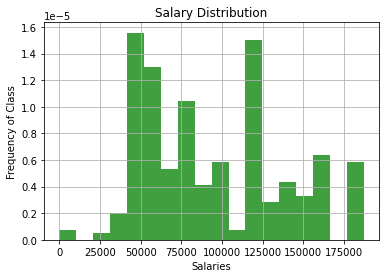

In [177]:
n, bins, patches = plt.hist(white_house_salaries['SALARY'], 18, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Salaries')
plt.ylabel('Frequency of Class')
plt.title('Salary Distribution')
plt.grid(True)
plt.show()

The distribution of is a Random, with no discernible pattern

In [205]:
white_house_salaries["POSITION TITLE"].isnull().values.any()

True

In [206]:
modified_wh = white_house_salaries[white_house_salaries["POSITION TITLE"].notna()]

In [207]:
#comparing salaries by position title
modified_wh["POSITION TITLE"].value_counts()

EXECUTIVE ASSISTANT                                                             20
STAFF ASSISTANT                                                                 18
ASSOCIATE DIRECTOR                                                              17
INFORMATION SERVICES OPERATOR                                                   12
ASSOCIATE COUNSEL TO THE PRESIDENT                                              12
                                                                                ..
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF STRATEGIC COMMUNICATIONS              1
SPECIAL PROJECTS MANAGER                                                         1
SENIOR POLICY ADVISOR                                                            1
DEPUTY ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF TO THE SENIOR COUNSELOR     1
SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE AND HOMELAND SECURITY POLICY      1
Name: POSITION TITLE, Length: 214, dtype: int64

In [208]:
modified_wh.groupby("POSITION TITLE").SALARY.mean().sort_values(ascending=False).head(10)

POSITION TITLE
SENIOR POLICY ADVISOR                                                                                      187100.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE OFFICE OF PUBLIC LIAISON                                    179700.0
ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL SECURITY ADVISOR FOR STRATEGY                               179700.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF COMMUNICATIONS FOR THE OFFICE OF PUBLIC LIAISON                 179700.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF PRESIDENTIAL PERSONNEL                                          179700.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SOCIAL MEDIA                                                    179700.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE DOMESTIC POLICY COUNCIL                                     179700.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE OFFICE OF LEGISLATIVE AFFAIRS                               179700.0
ASSISTANT TO THE PRESIDENT AND EXECUTIVE SECRETARY AND CH

The above Series describes the Position Titles of the highest average salaries within a Position Title 

In [209]:
modified_wh.groupby("POSITION TITLE").SALARY.mean().sort_values(ascending=True).head(10)

POSITION TITLE
FIRST DAUGHTER AND ADVISOR TO THE PRESIDENT                                        0.0
ASSISTANT TO THE PRESIDENT FOR INTERGOVERNMENTAL AND TECHNOLOGY INITIATIVES        0.0
ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR                                      0.0
ASSISTANT TO THE PRESIDENT FOR STRATEGIC INITIATIVES                           30000.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE NATIONAL ECONOMIC COUNCIL       30000.0
PERSONAL AIDE                                                                  40000.0
RESEARCH ASSISTANT AND EXECUTIVE ASSISTANT                                     40000.0
RESEARCH ANALYST                                                               42000.0
WRITER FOR CORRESPONDENCE                                                      43500.0
PRODUCTION ASSISTANT                                                           47000.0
Name: SALARY, dtype: float64

The above Series describes the Position Titles of the lowest average salaries within a Position Title 

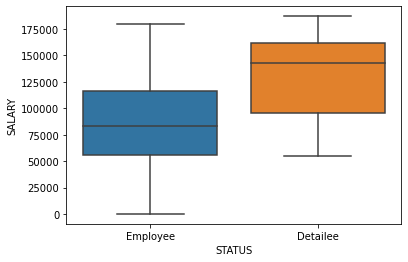

In [190]:
#does salary depend on Employee Status?
ax = sns.boxplot(x="STATUS", y="SALARY",data=white_house_salaries)

As seen in the boxplot, Staff with the Status of 'Detailees' are paid more than Staff with Status 'Employee'. 

In [203]:
#Hypothesis testing - Salary has a relationship with the Status
#let alpha threshold be 0.05
#Null Hypothesis - There is no relationship between Salary and Status of White House Staff

In [202]:
pay_position_lm = smf.ols('Q("SALARY") ~ Q("STATUS")', data=white_house_salaries).fit()
pay_position_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("SALARY")   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.03
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           0.000583
Time:                        18:44:39   Log-Likelihood:                -4551.7
No. Observations:                 377   AIC:                             9107.
Df Residuals:                     375   BIC:                             9115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.288e+05      1e+04     12.858      0.000    1.09e+05    1.48e+05
Q("STATUS")[T.Employee] -3.561e+04   1.03e+04     -3.469      0.001   -5.58e+04   -1.54e+04
==============================================================================
Omnibus:                       32.755   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.683
Skew:                           0.463   Prob(JB):                     1.96e-05
Kurtosis:                       2.276   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above F-Statistic indicates that the Null Hypothesis can be rejected, as the Probability of seeing the Data that we have if the Null Hypothesis was true, would be 0.000583, which is much lower than the Alpha of 0.05 

In [212]:
# 2 b)
fractal_data = pd.read_csv("https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv")
fractal_data.head(10)

,0,23.82729036706873
0,1,23.589108
1,2,24.529556
2,3,16.684580
3,4,22.075507
4,5,21.892569
5,6,20.375133
6,7,22.673543
7,8,21.183123
8,9,21.672874
9,10,24.523231


In [214]:
fractal_data.columns

Index(['0', '23.82729036706873'], dtype='object')

In [219]:
#the column names are not useful and make for confusing names 
#modifying to more appropriate names

In [217]:
modified_fract = fractal_data.rename({'23.82729036706873': 'Number_X', '0':'ID'}, 
                                     axis=1)
modified_fract = modified_fract.set_index('ID')
modified_fract.head(10)

,Number_X
ID,
1,23.589108
2,24.529556
3,16.684580
4,22.075507
5,21.892569
6,20.375133
7,22.673543
8,21.183123
9,21.672874


In [221]:
modified_fract["Number_X"].describe()

count    9999.000000
mean       23.035996
std         2.995436
min        11.248686
25%        21.007170
50%        23.024031
75%        25.069370
max        33.286533
Name: Number_X, dtype: float64

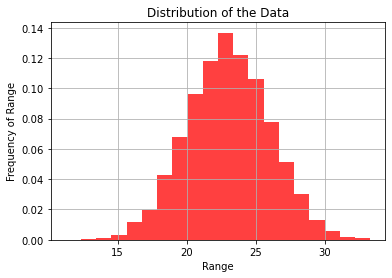

In [225]:
n, bins, patches = plt.hist(modified_fract["Number_X"], 20, density=True, facecolor='r', alpha=0.75)

plt.xlabel('Range')
plt.ylabel('Frequency of Range')
plt.title('Distribution of the Data')
plt.grid(True)
plt.show()

The distribution is a perfect Normal Distribution, which indicates that this is synthetic data that was generated to form a normal distrbution. It is extrememly rare to find such a perfect normal distribution in real life.

3 a)

A brute-force method for filling in numerical Null Values is replacing them with 0 or -999, which can serve the purpose of indicating that such an entry is that of a missing value. This is extremely inefficient and would result in inaccurate representation of the data. Besides, this would work only for numeric values.

The most common way to imputate missing values is by replacing each value by the mean or median. For a 365 GB File, this is an inefficient method. If three columns have missing values, we would need to compute means for 3x365 entries. This would also not work with non-numerical or categorical data.

In such a case, filling with the most common value in the column, or the mode would be much quicker. This would work for categorical variables too.

In both of the statistical Methods, a column is treated without considering its relation to other columns. The relationship between variables is not preserved in these methods.

A regression model, that has captured the relationship between the variables in a dataset, can be used to predict the missing values. This can accurate for datasets that show high degree of correlation between variables.

Nearest Neighbors apporoach is another algorithm that is based on the principle of finding missing values based on the data point's similarity with other data points in the dataset. Like all Clustering problems, to impute missing values, a data point's cluser will be used to predict the value.


My approach would be the Nearest Neighbor method or the Regression Method, whicher has the higher accuracy. A python librbary called 'missingpy' (documentation: https://pypi.org/project/missingpy/)  is based on the KNN approach that provides the functionality to impute missing values by similarity.


4)

To automate imputation, there are libraries and tools that work on the above principles, that can help in performing imputation at specific times and based on the latest available data.

Last Observation Carried Forward (LOCF) techinique is particulary useful for getting the most accurate predictions of a dataset that is updated with intervals or time, i.e, a dataset that varies with time. If the dataset does not vary with time, a one-time prediction is sufficient and missing values will not need any additional appraoch other than the ones discussed in part 3. 


For the purposes of automatic imputation, I would make use of the Autoimpute (documentation: https://pypi.org/project/autoimpute/) Python library that allows for analysis of the imputation method. If a dataset varies with time, there is the opportunity to learn better or more appropriate methods of imputation, which can be done with the analysis components in the Autoimpute library. 


5)
Grace Hopper is my favorite Computer Scientist. In addition to her enormous contributions to the Compiler Design and COBOL, she was an inspirational teacher shaping the minds of the next generation researchers. She is a trailblazer who was the First to many titles, positions, and inventions. She was one of the pioneers of the first digital computers in the year 1946. One can only imagine the hoops she would have had to jump through to be taken seriously as a Computer Science Researcher in the 1940s, when most women in the world could not even vote. She also had the foresight to predict the trajectory of computers and their ubiquitousness in the future. Her legacy as an iconic Computer Scientist is celebrated every year at the GHC conferences, where budding women Computer Scientists repsent their research.  